In [47]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
t_howard = pd.read_csv('prot_howard.dat',sep='\s+')
print(t_howard)

           TIC Sectors      RAdeg    DEdeg     Prot   e_Prot    Ro  LSSN  \
0       593228       5   71.84526 -27.8415  95.5000  0.40000  3.21    12   
1       593230       5   71.84526 -27.8415  95.5000  0.40000  3.21    12   
2      5656273       2  347.08170 -15.4098   0.4313  0.00020  0.01    57   
3      5796048       2  348.93430 -12.3647   0.5557  0.00001  0.01    33   
4      9210746       2  352.55716 -20.3916   7.4820  0.00400  0.12    14   
..         ...     ...        ...      ...      ...      ...   ...   ...   
117  431589361   1+2+6   50.75692 -74.3164  95.5000  2.80000  3.21     9   
118  434101713       2  353.12900 -12.2647   5.6820  0.00040  0.11    35   
119  441398770       1  310.46426 -32.4369   6.5000  0.50000  0.15     6   
120  441499423       4   46.56125 -12.7151   1.0998  0.00050  0.03    39   
121  471016669       2  359.33569 -12.9800   7.6270  0.00200  0.09    12   

         Tpeak  dM-EVR  dF-EVR Rot?   dM-TESS  dF-TESS    Tspot  Fspot  \
0    57751.04

In [ ]:
ro_howard = t_howard[t_howard['Ro'] > 0.1]['Ro']

In [72]:
t_mcq = pd.read_csv('prot_mcq.dat',sep='\s+')
print(t_mcq)

       KOI       KIC  Teff  log(g)    Rad    POrb    PRot  e_PRot   RVar
0        3  10748390  4766    4.59   4.68   4.888  29.472   0.134  11.75
1       12   5812701  6419    4.26  13.40  17.855   1.245   0.124   0.78
2       41   6521045  5909    4.28   1.24   6.887  24.988   2.192   0.39
3       42   8866102  6170    4.10   2.71  17.834  20.850   0.007   1.12
4       44   8845026  6250    3.50   9.61  66.468   3.792   0.907   1.16
...    ...       ...   ...     ...    ...     ...     ...     ...    ...
2005  3141   5440317  5348    4.53   1.10   2.319     NaN     NaN    NaN
2006  3142   3752110  6279    4.66   2.30  27.944     NaN     NaN    NaN
2007  3145   1717722  4638    4.72   0.87   0.977     NaN     NaN    NaN
2008  3146  10908248  5664    4.35   1.41  39.858     NaN     NaN    NaN
2009  3147   7534267  5539    4.69   1.17  39.441     NaN     NaN    NaN

[2010 rows x 9 columns]


In [ ]:
prot_mcq = t_mcq['PRot']

In [4]:
t_eu = pd.read_csv('exoplanet.eu_catalog.csv')
print(t_eu)

         # name planet_status   mass  mass_error_min  mass_error_max  \
0      11 Com b     Confirmed    NaN             NaN             NaN   
1      11 Oph b     Confirmed  21.00            3.00            3.00   
2      11 UMi b     Confirmed    NaN             NaN             NaN   
3      14 And b     Confirmed    NaN             NaN             NaN   
4      14 Her b     Confirmed   9.10             NaN             NaN   
...         ...           ...    ...             ...             ...   
5220  ups And c     Confirmed   9.10            2.93            5.04   
5221  ups And d     Confirmed  23.58            2.29            2.93   
5222  ups And e     Confirmed    NaN             NaN             NaN   
5223  ups Leo b     Confirmed    NaN             NaN             NaN   
5224  zet Del B     Confirmed  40.00            5.00           15.00   

      mass_sini  mass_sini_error_min  mass_sini_error_max  radius  \
0       16.1284                1.500                1.500     NaN 

In [21]:
a = t_eu[pd.notnull(t_eu['mag_v']) & pd.notnull(t_eu['mag_k'])].loc[:,['mag_v', 'mag_k','semi_major_axis']]
print(a)
print(len(a))

       mag_v  mag_k  semi_major_axis
3      5.220  2.330          0.83000
8      5.520  3.670          2.60000
98     5.860  3.700          2.11000
107    5.650  3.270          2.50000
264   11.750  7.290              NaN
...      ...    ...              ...
5166  12.074  6.420          0.02156
5167  12.074  6.420          0.02851
5196   4.790  2.420          2.60000
5197   4.720  2.170          0.58000
5224   4.647  4.357        907.00000

[126 rows x 3 columns]
126


In [22]:
# wright et al 2018 (eqn 5): valid for range 1.1 < V-K < 7.0
def taucVK(V,K):
    if np.fabs(V - K - 4.05) <= 2.95:
        return pow(10.,0.64 + 0.25 * (V - K))
    else:
        return np.NaN

def RoVK(Prot, V, K):
    return Prot / taucVK(V,K)
    
    
# wright et al 2018 (eqn 6): valid for range 0.08 < M/Msol < 1.36
#M in solar masses
def taucM(M):
    if np.fabs(M - 0.72) <= 0.64:
        return pow(10., 2.33 - 1.50 * M + 0.31 * pow(M, 2.))
    else:
        return np.NaN
    
def RoM(Prot, M):
    return Prot / taucM(M)
    

In [24]:
roVK_eu = a.apply(lambda row: RoVK(27.,row['mag_v'],row['mag_k']),axis=1)
taucVK_eu = a.apply(lambda row: taucVK(row['mag_v'],row['mag_k']),axis=1)
a['RoVK'] = roVK_eu
a['TaucVK'] = taucVK_eu
a

,mag_v,mag_k,semi_major_axis,RoVK,TaucVK
3,5.220,2.330,0.83000,1.171828,23.040930
8,5.520,3.670,2.60000,2.132376,12.661933
98,5.860,3.700,2.11000,1.783872,15.135612
107,5.650,3.270,2.50000,1.571679,17.179084
264,11.750,7.290,NaN,0.474639,56.885293
...,...,...,...,...,...
5166,12.074,6.420,0.02156,0.238706,113.109739
5167,12.074,6.420,0.02851,0.238706,113.109739
5196,4.790,2.420,2.60000,1.580752,17.080477
5197,4.720,2.170,0.58000,1.425160,18.945235


In [25]:
b = t_eu[pd.notnull(t_eu['star_mass'])].loc[:,['star_mass','semi_major_axis']]
print(b)
print(len(b))

      star_mass  semi_major_axis
0        2.7000           1.2900
1        0.0162         243.0000
2        1.8000           1.5400
3        2.2000           0.8300
4        0.9000           2.8450
...         ...              ...
5219     1.2700           0.0590
5220     1.2700           0.8610
5221     1.2700           2.5500
5222     1.2700           5.2456
5224     2.5000         907.0000

[4676 rows x 2 columns]
4676


In [26]:
roM_eu = b.apply(lambda row: RoM(27.,row['star_mass']),axis=1)
taucM_eu = b.apply(lambda row: taucM(row['star_mass']),axis=1)
b['RoM'] = roM_eu
b['TaucM'] = taucM_eu
b

,star_mass,semi_major_axis,RoM,TaucM
0,2.7000,1.2900,NaN,NaN
1,0.0162,243.0000,NaN,NaN
2,1.8000,1.5400,NaN,NaN
3,2.2000,0.8300,NaN,NaN
4,0.9000,2.8450,1.585856,17.025505
...,...,...,...,...
5219,1.2700,0.0590,3.208963,8.413932
5220,1.2700,0.8610,3.208963,8.413932
5221,1.2700,2.5500,3.208963,8.413932
5222,1.2700,5.2456,3.208963,8.413932


In [27]:
RoVK_good = a[pd.notnull(a['RoVK']) & a['RoVK'] > 0.1]
RoM_good = b[pd.notnull(b['RoM']) & b['RoM'] > 0.1]

In [28]:
print(RoVK_good)
print(RoM_good)

       mag_v  mag_k  semi_major_axis      RoVK      TaucVK
3      5.220   2.33          0.83000  1.171828   23.040930
8      5.520   3.67          2.60000  2.132376   12.661933
98     5.860   3.70          2.11000  1.783872   15.135612
107    5.650   3.27          2.50000  1.571679   17.179084
264   11.750   7.29              NaN  0.474639   56.885293
...      ...    ...              ...       ...         ...
5165  12.074   6.42          0.01634  0.238706  113.109739
5166  12.074   6.42          0.02156  0.238706  113.109739
5167  12.074   6.42          0.02851  0.238706  113.109739
5196   4.790   2.42          2.60000  1.580752   17.080477
5197   4.720   2.17          0.58000  1.425160   18.945235

[116 rows x 5 columns]
      star_mass  semi_major_axis       RoM      TaucM
4         0.900           2.8450  1.585856  17.025505
5         0.900          27.4000  1.585856  17.025505
6         1.010           1.6800  1.995872  13.527919
7         1.220           1.4500  2.950936   9.14964

In [67]:
x = np.linspace(0.,1.,1000) # ro/ro sol x vals
prot_sol = 27.
ro_sol = 1.85
# all values scaled to solar values at maximum
# combining eqns: (7) Farrish 2019 and (2) Farrish 2021
def ra_schrijver(ro, rad):
    return pow(ro / ro_sol, -1.5 * -0.16) * pow(rad, 2 * -0.16)

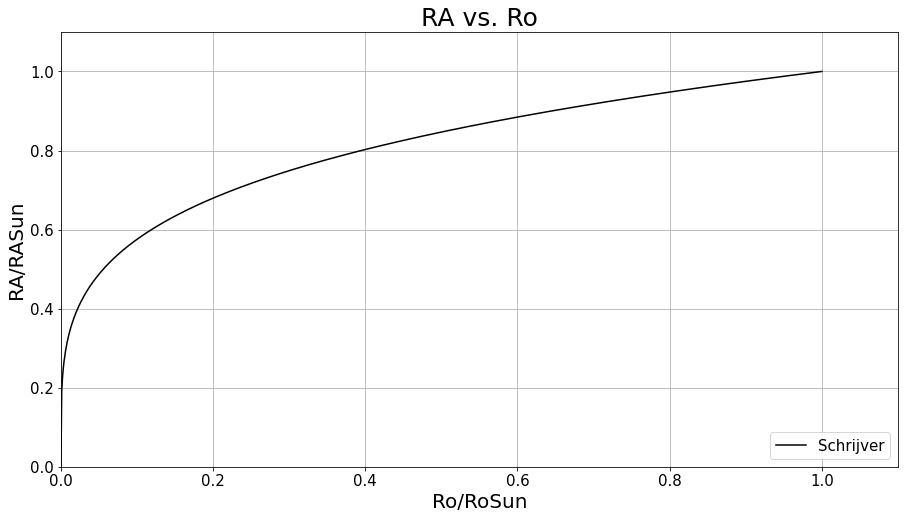

In [77]:
fig1 = plt.figure(figsize=(15,8))
ax1 = fig1.add_subplot(111)
ax1.plot(x, ra_schrijver(x * ro_sol, 1.), color='black', label='Schrijver')
ax1.set_title("RA vs. Ro",fontsize=25)
ax1.set_xlabel("Ro/RoSun",fontsize=20)
ax1.set_ylabel("RA/RASun",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.grid(visible=True)
ax1.set_xlim([0.0,1.1])
ax1.set_ylim([0.0,1.1])
ax1.legend(loc=4,fontsize=15)
pass